<a href="https://colab.research.google.com/github/JuanLara18/Actuarial-DataMined-Provisiones/blob/main/notebooks/Actuarial_Reserving_Analysis_with_Chain_Ladder_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data can be download [here](https://www.casact.org/publications-research/research/research-resources/loss-reserving-data-pulled-naic-schedule-p).

# Data Understanding

we are importing essential libraries and loading a dataset from a CSV file named "wkcomp_pos.csv." These libraries include pandas for data manipulation, matplotlib.pyplot for plotting, seaborn for enhancing data visualization, and numpy for numerical operations. This initial step is crucial for our data analysis and visualization process.

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("wkcomp_pos.csv")

Display basic information about the dataset

In [8]:
print("Dataset Information:")
print("Number of Records:", data.shape[0])
print("Number of Attributes:", data.shape[1])

Dataset Information:
Number of Records: 13200
Number of Attributes: 13


Display data types of attributes

In [9]:
print("\nData Types of Attributes:")
print(data.dtypes)


Data Types of Attributes:
GRCODE                int64
GRNAME               object
AccidentYear          int64
DevelopmentYear       int64
DevelopmentLag        int64
IncurLoss_D           int64
CumPaidLoss_D         int64
BulkLoss_D            int64
EarnedPremDIR_D       int64
EarnedPremCeded_D     int64
EarnedPremNet_D       int64
Single                int64
PostedReserve97_D     int64
dtype: object



While exploring the dataset, we noticed that the "GRNAME" variable, categorized as "object," exclusively contains non-numeric values. As expected, all other variables are integers. Upon printing some of the "GRNAME" values, it became clear that they effectively represent company names.

Now, we check unique values and coding schemes for specific attributes

In [10]:
print("\nCoding Schemes:")
print("Number of unique values in 'GRCODE':", len(data['GRCODE'].unique()))
print("Number of unique values in 'GRNAME':", len(data['GRNAME'].unique()))
print("Number of unique values in 'AccidentYear':", len(data['AccidentYear'].unique()))
print("Number of unique values in 'DevelopmentYear':", len(data['DevelopmentYear'].unique()))


Coding Schemes:
Number of unique values in 'GRCODE': 132
Number of unique values in 'GRNAME': 132
Number of unique values in 'AccidentYear': 10
Number of unique values in 'DevelopmentYear': 19


We explore the range of the variables

In [11]:
import warnings

integer_columns = data.select_dtypes(include='int64').columns
integer_columns = data.select_dtypes(include='int64').columns
result = pd.DataFrame(columns=['Column Name', 'Min', 'Max'])
warnings.simplefilter(action='ignore', category=FutureWarning)

# Fill the result
for column in integer_columns:
    min_value = data[column].min()
    max_value = data[column].max()
    result = result.append({'Column Name': column, 'Min': min_value, 'Max': max_value}, ignore_index=True)

# Print the table
result

,Column Name,Min,Max
0,GRCODE,86,44300
1,AccidentYear,1988,1997
2,DevelopmentYear,1988,2006
3,DevelopmentLag,1,10
4,IncurLoss_D,-59,367404
5,CumPaidLoss_D,-338,325322
6,BulkLoss_D,-4621,145296
7,EarnedPremDIR_D,-6518,421223
8,EarnedPremCeded_D,-3522,78730
9,EarnedPremNet_D,-9731,418755


We are about to delve into the examination of a single run-off triangle. In this initial phase of our exploration, we will be working with the entirety of the available data. Our objective is to closely observe and gain insights into the characteristics and visual representation of this specific run-off triangle. This comprehensive analysis will provide us with a foundational understanding of its structure and behavior, which will be invaluable as we proceed with our further investigations and analyses.

In [ ]:
# Here we plot whole

Now, we perform initial checks for missing values and data types.

In [12]:
missing_values = data.isnull().sum()
data_types = data.dtypes

print(missing_values)
print(data_types)

GRCODE               0
GRNAME               0
AccidentYear         0
DevelopmentYear      0
DevelopmentLag       0
IncurLoss_D          0
CumPaidLoss_D        0
BulkLoss_D           0
EarnedPremDIR_D      0
EarnedPremCeded_D    0
EarnedPremNet_D      0
Single               0
PostedReserve97_D    0
dtype: int64
GRCODE                int64
GRNAME               object
AccidentYear          int64
DevelopmentYear       int64
DevelopmentLag        int64
IncurLoss_D           int64
CumPaidLoss_D         int64
BulkLoss_D            int64
EarnedPremDIR_D       int64
EarnedPremCeded_D     int64
EarnedPremNet_D       int64
Single                int64
PostedReserve97_D     int64
dtype: object


# Data Preparation and Statistics Related

In [13]:
# Extract de information in DataFrames
Important_Variables = data.columns.delete([0,1,2,3,4,-1,-2,-3,-4,-5])
DataComplete = {column : [] for column in Important_Variables}
size = data.shape[0]

for Variable in Important_Variables:
  count = 0
  while(size - 100*count > 1):
    base_Variable = np.zeros((10,10))
    for i in range(10):
      for j in range(10):
        base_Variable[i][j] = data[Variable][i*10+j + 10*count]
    count = count + 1
    DataComplete[Variable].append(pd.DataFrame(base_Variable))

In [14]:
# Construct the Triangles
def IncompleteDataFrame(x):
  matrix = x.values
  for i in range(9,0,-1):
    for j in range(10-i,10,1):
        matrix[i][j] = 0
  return pd.DataFrame(matrix)

Triangles = {}
for variable, array in DataComplete.items():
  Triangles[variable] = [IncompleteDataFrame(x) for x in array]

We need to understand the context of negative values within the financial columns.

In [16]:
# Check for negative values in the financial columns
relevant_columns = [
    'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D',
    'EarnedPremDIR_D', 'EarnedPremCeded_D', 'EarnedPremNet_D'
]

negative_values_summary = (data[relevant_columns] < 0).sum()
print(negative_values_summary)

IncurLoss_D            5
CumPaidLoss_D         13
BulkLoss_D           165
EarnedPremDIR_D      160
EarnedPremCeded_D    290
EarnedPremNet_D      260
dtype: int64


In [17]:
# Find the basics statistics component by component for each variable
Means = {}
for variable, array in Triangles.items():
  Means[variable] = pd.concat(array).groupby(level=0).mean()

Var = {}
for variable, array in Triangles.items():
  Var[variable] = pd.concat(array).groupby(level=0).var()

Min = {}
for variable, array in Triangles.items():
  Min[variable] = pd.concat(array).groupby(level=0).min()

Max = {}
for variable, array in Triangles.items():
  Max[variable] = pd.concat(array).groupby(level=0).max()

Median = {}
for variable, array in Triangles.items():
  Median[variable] = pd.concat(array).groupby(level=0).median()

In [18]:
# Define the function to plot the series
def DrawGraph(x, name):
  matrix = x.values
  plt.figure(figsize=(9, 7))
  plt.plot()

  for i in range(10):
    val = matrix[i]
    for j in range(i):
      val = val[:-1]
    rang = range(1988,1988+len(val))
    plt.plot(rang, val, marker='o', linestyle='-', label=1988+i)

  plt.xlabel('Years')
  plt.ylabel('Value')
  plt.title(name)

  plt.savefig(name, dpi=300, bbox_inches='tight')

  plt.legend()

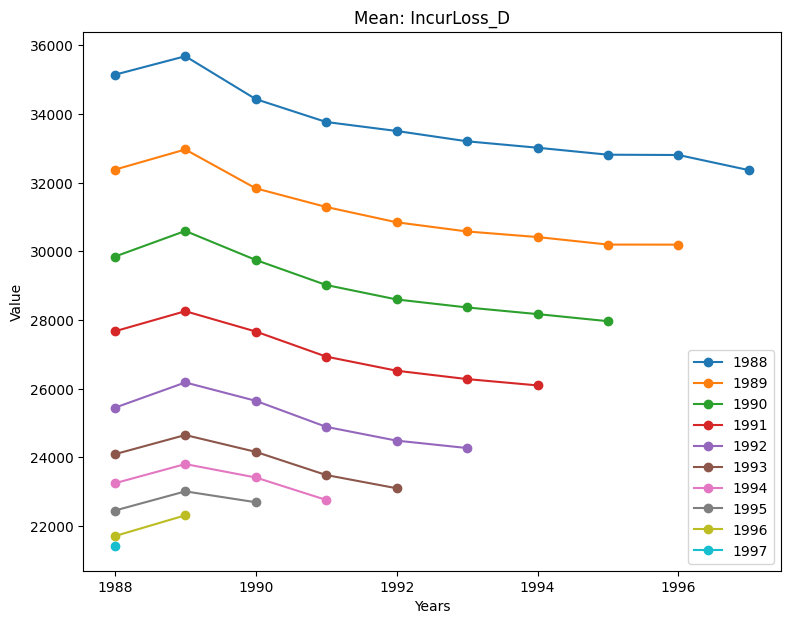

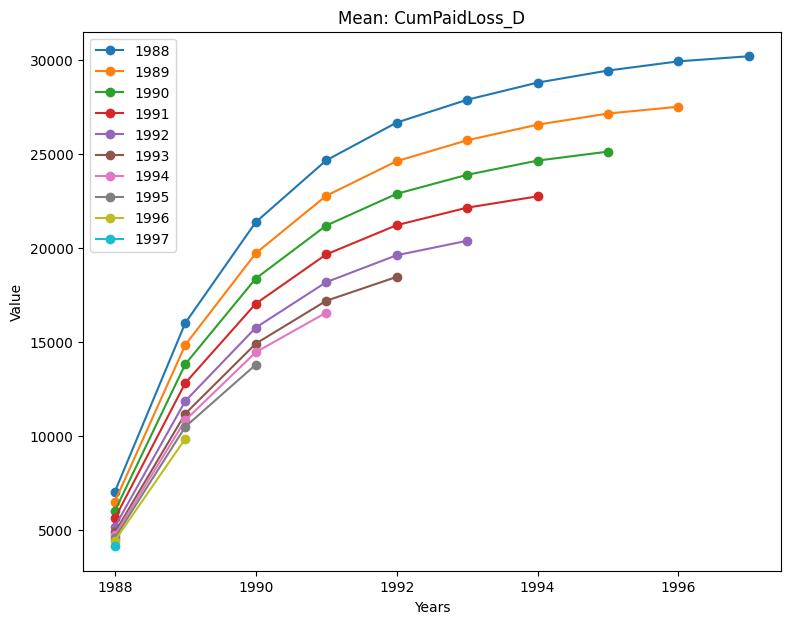

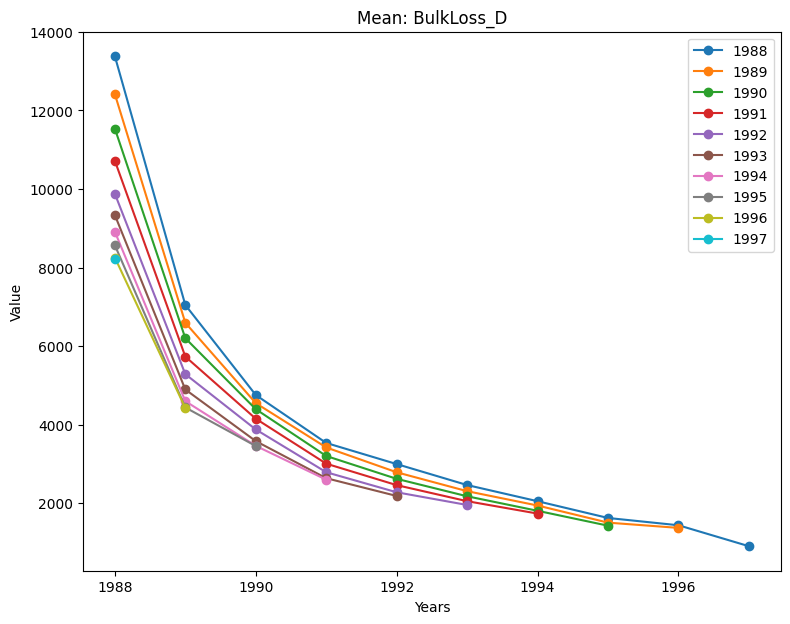

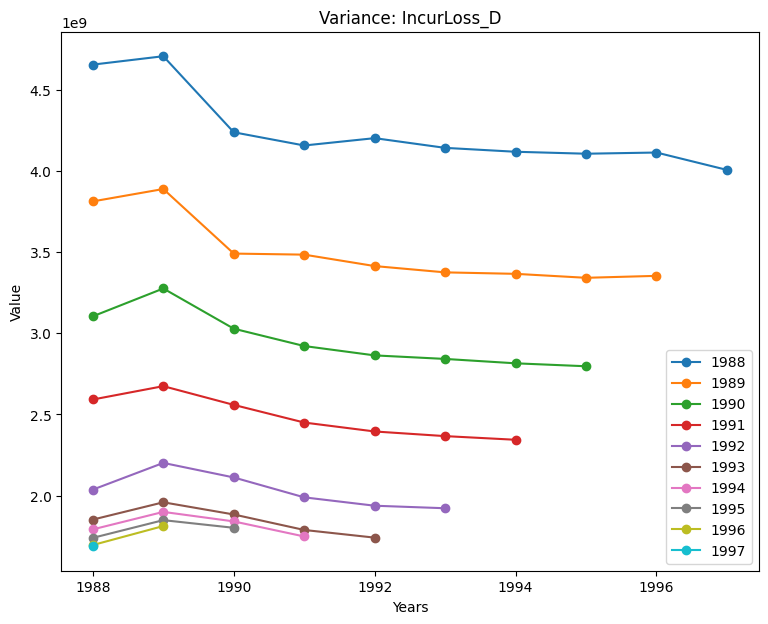

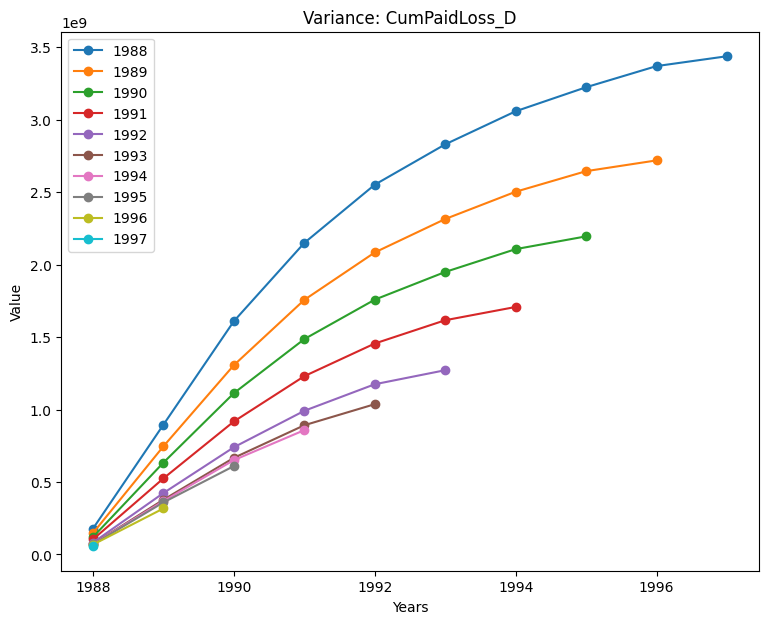

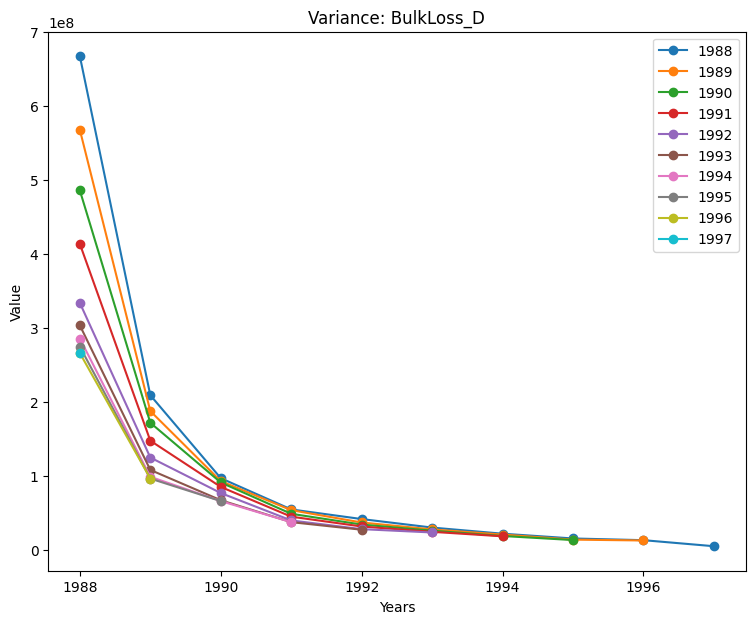

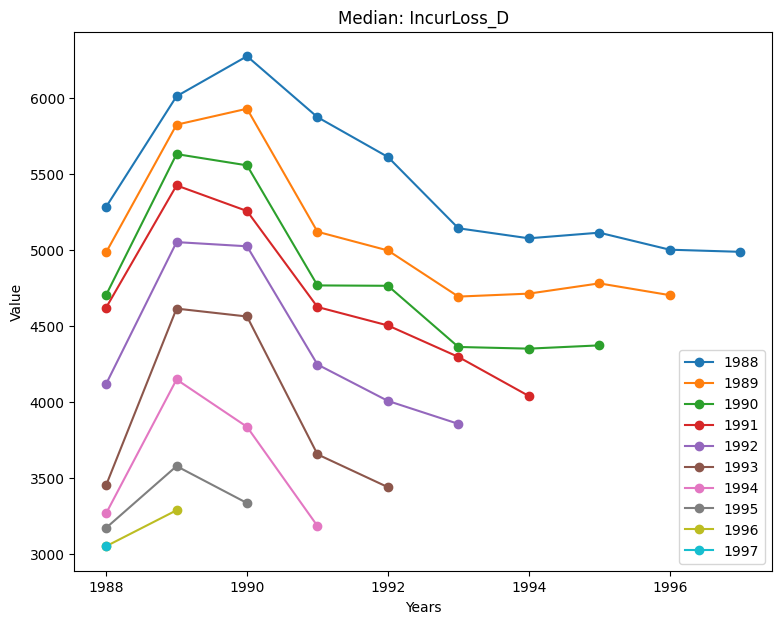

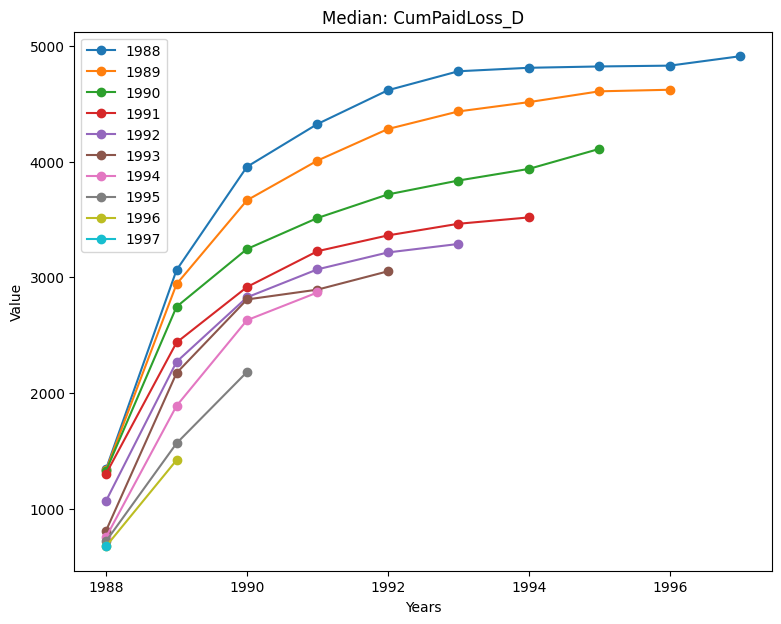

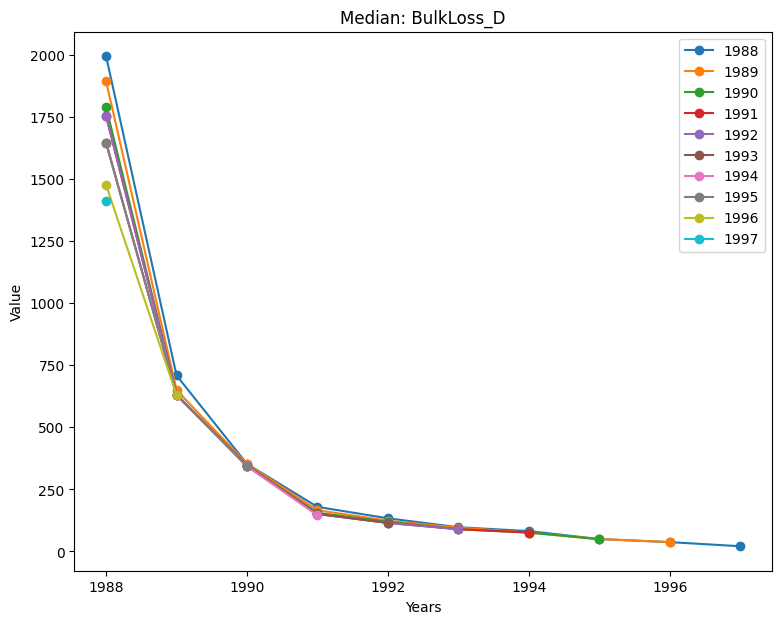

In [19]:
# Export the graphs of the basis statistics
for var in Important_Variables:
  DrawGraph(Means[var], 'Mean: ' + var)

for var in Important_Variables:
  DrawGraph(Var[var], 'Variance: ' + var)

for var in Important_Variables:
  DrawGraph(Median[var], 'Median: ' + var)

## Normalization and PCA

In [20]:
# Normalize the numerical data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[relevant_columns])

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_normalized)

# Explained variance ratio of the PCA components
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[7.61951560e-01 1.43501285e-01 8.60849015e-02 7.58461431e-03
 8.77639488e-04 5.66312733e-13]


## Correlation Analysis

To understand the relationships between variables, we examine the correlation matrix.

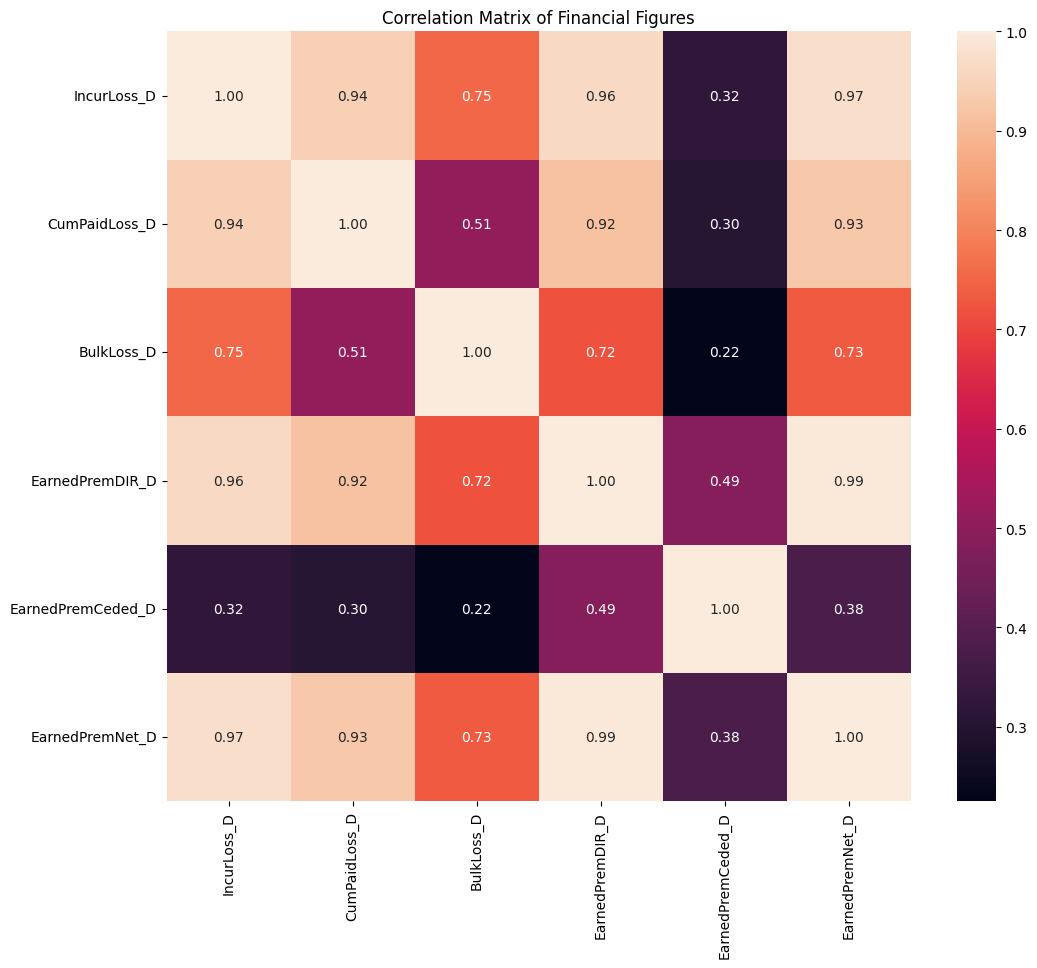

In [21]:
# Generate a correlation matrix
correlation_matrix = data[relevant_columns].corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Financial Figures')
plt.show()

# Models

## Chain Ladder technique

Chain Ladder Method (also known as development triangle method) is a traditional actuarial technique used in claims reserving to predict future claims costs. The method assumes that the development of claims costs over time is consistent across years and that the pattern of claims development can be predicted from past data.

HStep-by-step outline of the Chain Ladder model function and its application:

1. Define a function to calculate the development factors for each diagonal of the triangle.
2. Use these factors to project the incomplete parts of the triangle.
3. Define a function to apply the Chain Ladder method to a single triangle.
4. Apply the Chain Ladder method to all triangles in the dataset.
5. Store all completed triangles.
6. Evaluate the performance of the model using an appropriate measure, such as the mean absolute error between the projected values and the actual values (for the parts of the triangle that are complete).

In [ ]:
def chain_ladder_deterministic(data):

    data = data.values.tolist()
    for i in range(1,10):
      for j in range(i):
        data[i].pop()

    development_factors = []
    cumulative_factors = []

    # Calcular los factores de desarrollo
    for i in range(1, len(data)):
        development_factor = sum(data[i])/sum(data[i - 1])
        development_factors.append(development_factor)

    # Calcular los factores acumulados
    cumulative_factor = 1
    for factor in development_factors:
        cumulative_factor *= factor
        cumulative_factors.append(cumulative_factor)

    # Proyectar reclamaciones futuras
    ultimate_claim = sum(data[0]) * cumulative_factors[-1]
    projected_claims = [ultimate_claim * factor for factor in cumulative_factors]

    print(ultimate_claim)
    print(projected_claims)

    # Completar el triángulo de datos con las proyecciones
    full_data = data.copy()
    for i in range(len(data), len(data) + len(projected_claims)):
        print("i:",i)
        print(projected_claims[i - len(data)])
        full_data.append([projected_claims[i - len(data)]])

    return full_data

# Ejemplo de uso
data = Triangles['IncurLoss_D'][0]

full_data = chain_ladder_deterministic(data)

pd.DataFrame(full_data)


6725.0
[5232.050656198458, 4353.024855340758, 3694.044270392738, 2195.8031273386496, 1010.0103039662924, 785.5539762068679, 551.5443966423593, 200.67009304811094, 12.90331761180795]
i: 10
5232.050656198458
i: 11
4353.024855340758
i: 12
3694.044270392738
i: 13
2195.8031273386496
i: 14
1010.0103039662924
i: 15
785.5539762068679
i: 16
551.5443966423593
i: 17
200.67009304811094
i: 18
12.90331761180795


,0,1,2,3,4,5,6,7,8,9
0,367404.000000,362988.0,347288.0,330648.0,354690.0,350092.0,346808.0,349124.0,348157.0,347762.0
1,336928.000000,316483.0,278496.0,303033.0,299496.0,295061.0,299251.0,297492.0,300620.0,NaN
2,289198.000000,311381.0,277980.0,277732.0,276563.0,278067.0,276704.0,281101.0,NaN,NaN
3,297174.000000,277209.0,269739.0,272666.0,271318.0,267578.0,269592.0,NaN,NaN,NaN
4,181796.000000,205079.0,199106.0,187833.0,185663.0,184940.0,NaN,NaN,NaN,NaN
5,114807.000000,114774.0,101460.0,98430.0,96930.0,NaN,NaN,NaN,NaN,NaN
6,107934.000000,107569.0,97730.0,96185.0,NaN,NaN,NaN,NaN,NaN,NaN
7,100686.000000,94456.0,92314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,53381.000000,51205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6725.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
DataComplete["IncurLoss_D"][0]

,0,1,2,3,4,5,6,7,8,9
0,367404.0,362988.0,347288.0,330648.0,354690.0,350092.0,346808.0,349124.0,348157.0,347762.0
1,336928.0,316483.0,278496.0,303033.0,299496.0,295061.0,299251.0,297492.0,300620.0,296626.0
2,289198.0,311381.0,277980.0,277732.0,276563.0,278067.0,276704.0,281101.0,278023.0,279032.0
3,297174.0,277209.0,269739.0,272666.0,271318.0,267578.0,269592.0,267745.0,266677.0,264467.0
4,181796.0,205079.0,199106.0,187833.0,185663.0,184940.0,184507.0,184705.0,183888.0,181261.0
5,114807.0,114774.0,101460.0,98430.0,96930.0,96121.0,98085.0,93795.0,93753.0,95363.0
6,107934.0,107569.0,97730.0,96185.0,96124.0,95821.0,95722.0,95496.0,96374.0,95766.0
7,100686.0,94456.0,92314.0,92241.0,92929.0,92214.0,92107.0,92362.0,91470.0,93060.0
8,53381.0,51205.0,51087.0,51015.0,50226.0,50343.0,50060.0,49564.0,49739.0,49459.0
9,6725.0,6663.0,6473.0,2917.0,2933.0,3103.0,3002.0,2909.0,2907.0,2909.0


In [ ]:
for i in range(1,10):
  print(i)

1
2
3
4
5
6
7
8
9


In [ ]:
pd.DataFrame(full_data)

,0,1,2,3,4,5,6,7,8,9
0,367404.000000,362988.0,347288.0,330648.0,354690.0,350092.0,346808.0,349124.0,348157.0,347762.0
1,336928.000000,316483.0,278496.0,303033.0,299496.0,295061.0,299251.0,297492.0,300620.0,0.0
2,289198.000000,311381.0,277980.0,277732.0,276563.0,278067.0,276704.0,281101.0,0.0,0.0
3,297174.000000,277209.0,269739.0,272666.0,271318.0,267578.0,269592.0,0.0,0.0,0.0
4,181796.000000,205079.0,199106.0,187833.0,185663.0,184940.0,0.0,0.0,0.0,0.0
5,114807.000000,114774.0,101460.0,98430.0,96930.0,0.0,0.0,0.0,0.0,0.0
6,107934.000000,107569.0,97730.0,96185.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100686.000000,94456.0,92314.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,53381.000000,51205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6725.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Triangles.keys()

dict_keys(['IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D'])

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

def calculate_development_factors(triangle):
    """
    Calculate the average development factors for a given loss triangle.
    """
    factors = []
    for i in range(triangle.shape[0] - 1):
        development = triangle.iloc[i, :i+1] / triangle.iloc[i+1, :i+1]
        factor = development[development != np.inf].mean()
        factors.append(factor)
    return factors

def complete_triangle(triangle, factors):
    """
    Complete the triangle using the calculated development factors.
    """
    completed_triangle = triangle.copy()
    for i in range(completed_triangle.shape[0]):
        for j in range(completed_triangle.shape[1] - i):
            if pd.isnull(completed_triangle.iat[i, j]):
                completed_triangle.iat[i, j] = completed_triangle.iat[i, j-1] * factors[j-1]
    return completed_triangle

def chain_ladder_method(triangle):
    """
    Apply the Chain Ladder method to project a loss triangle.
    """
    # Calculate development factors excluding the last diagonal
    factors = calculate_development_factors(triangle.iloc[:-1])

    # Complete the triangle
    completed_triangle = complete_triangle(triangle, factors)

    return completed_triangle

def evaluate_model(actual_triangle, predicted_triangle):
    """
    Evaluate the model by calculating the mean absolute error between
    the actual and predicted values of the last diagonal.
    """
    actual_values = actual_triangle.iloc[-1, :-1]
    predicted_values = predicted_triangle.iloc[-1, :-1]
    return mean_absolute_error(actual_values, predicted_values)

# Assuming DataComplete contains all initial triangles, with the structure:
# DataComplete = {'IncurLoss_D': [triangle1, triangle2, ...], 'CumPaidLoss_D': [...], ...}
completed_triangles = {}
evaluation_results = {}

for variable, triangles in DataComplete.items():
    completed_triangles[variable] = []
    evaluation_results[variable] = []
    for triangle in triangles:
        # We assume the last diagonal of the triangle is unknown for evaluation
        actual_triangle = triangle.copy()
        # Removing the last diagonal for the model to predict
        triangle_to_predict = actual_triangle.iloc[:-1, :-actual_triangle.shape[0]]
        predicted_triangle = chain_ladder_method(triangle_to_predict)
        completed_triangle = pd.concat([predicted_triangle, actual_triangle.tail(1)], ignore_index=True)
        completed_triangles[variable].append(completed_triangle)
        evaluation_results[variable].append(evaluate_model(actual_triangle, completed_triangle))

# Output the evaluation results
#evaluation_results


## Regresión Lineal

In [ ]:
ejemplo = Triangles['IncurLoss_D'][0]

In [ ]:
ejemplo

,0,1,2,3,4,5,6,7,8,9
0,367404.0,362988.0,347288.0,330648.0,354690.0,350092.0,346808.0,349124.0,348157.0,347762.0
1,336928.0,316483.0,278496.0,303033.0,299496.0,295061.0,299251.0,297492.0,300620.0,0.0
2,289198.0,311381.0,277980.0,277732.0,276563.0,278067.0,276704.0,281101.0,0.0,0.0
3,297174.0,277209.0,269739.0,272666.0,271318.0,267578.0,269592.0,0.0,0.0,0.0
4,181796.0,205079.0,199106.0,187833.0,185663.0,184940.0,0.0,0.0,0.0,0.0
5,114807.0,114774.0,101460.0,98430.0,96930.0,0.0,0.0,0.0,0.0,0.0
6,107934.0,107569.0,97730.0,96185.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100686.0,94456.0,92314.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,53381.0,51205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
